In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pre

In [2]:
data_test = pd.read_csv("data_test.csv") 
data_train = pd.read_csv('data_train.csv')

data_train_original = pd.DataFrame(data_train)
data_test_original = pd.DataFrame(data_test)

print(len(data_train_original))
print(len(data_test_original))

#Eliminieren der NaN-Datensätze:
data_train_cleaned = data_train_original.dropna(axis=0, how='any')
data_test_cleaned = data_test_original.dropna(axis=0, how='any')

#data_test_cleaned.drop(856, inplace=True)
#data_test_cleaned.drop([237, 245, 363, 856, 1189, 1271, 1287, 1626, 1850, 2277, 2439, 2524, 3035, 3394], inplace=True)

print(len(data_train_cleaned))
n_dropped = len(data_train_original)-len(data_train_cleaned)
print(n_dropped ,'Datensätze aus Train entfernt.')

print(len(data_test_cleaned))
n_dropped = len(data_test_original)-len(data_test_cleaned)
print(n_dropped ,'Datensätze aus Test entfernt.')

14703
3676
14703
0 Datensätze aus Train entfernt.
3676
0 Datensätze aus Test entfernt.


Die Daten sind also schon vorher von fehlenden Werten bereinigt worden. Später will ich die entsprechenden Daten gegen andere Aufbereitungen der Daten testen, deswegen erzeuge ich noch weitere DataFrames.

In [3]:
data_tr = data_train_cleaned
data_te = data_test_cleaned
print(data_tr.head())
print(len(data_tr))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.29     34.04                48.0       1353.0           488.0   
1    -122.05     37.36                29.0       1733.0           255.0   
2    -118.42     34.19                33.0       3353.0           790.0   
3    -122.22     37.79                44.0       1487.0           314.0   
4    -116.95     32.81                31.0       1277.0           293.0   

   population  households  median_income  median_house_value  NEAR BAY  \
0      1945.0       487.0         2.4359            123700.0       0.0   
1       679.0       278.0         7.5337            406800.0       0.0   
2      2318.0       775.0         2.2589            269700.0       0.0   
3       961.0       272.0         3.5156            109500.0       1.0   
4       698.0       237.0         3.1106            147700.0       0.0   

   <1H OCEAN  INLAND  NEAR OCEAN  ISLAND  
0        1.0     0.0         0.0     0.0  
1        1.0     0

In [4]:
print(data_te.head())
print(len(data_te))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -123.18     40.58                18.0       1451.0           278.0   
1    -117.08     33.01                 5.0       5659.0           931.0   
2    -118.09     33.99                34.0       1369.0           270.0   
3    -118.30     34.10                25.0       3926.0          1715.0   
4    -123.58     39.66                15.0       1839.0           489.0   

   population  households  median_income  median_house_value  NEAR BAY  \
0       695.0       254.0         1.7262             73700.0       0.0   
1      2565.0       902.0         6.1949            238700.0       0.0   
2      1005.0       272.0         3.6920            172600.0       0.0   
3      4865.0      1612.0         1.6112            262500.0       0.0   
4       887.0       332.0         2.2429            100000.0       0.0   

   <1H OCEAN  INLAND  NEAR OCEAN  ISLAND  
0        0.0     1.0         0.0     0.0  
1        1.0     0

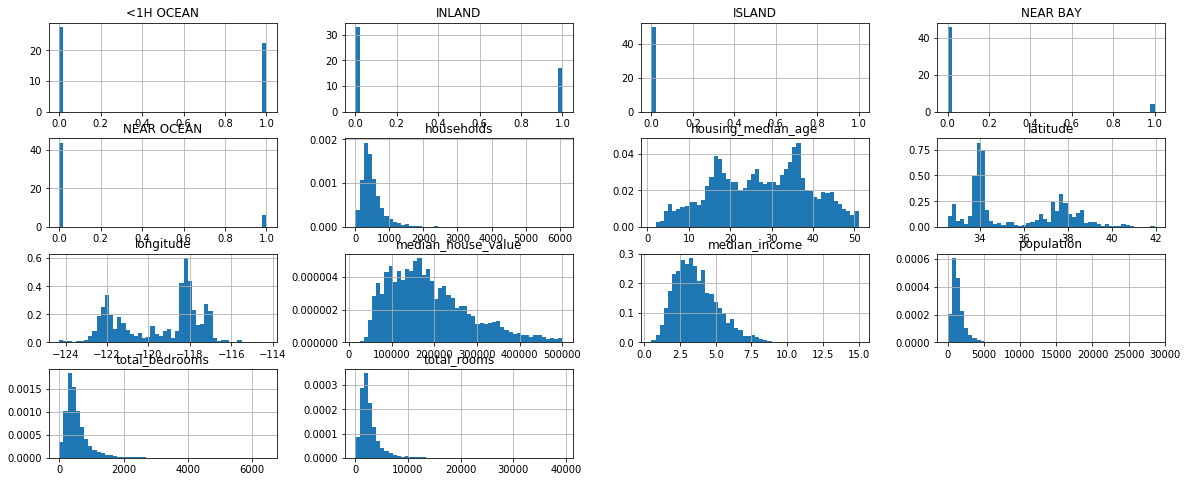

In [5]:
data_tr.hist(bins=50, density=True, figsize=(20,8));

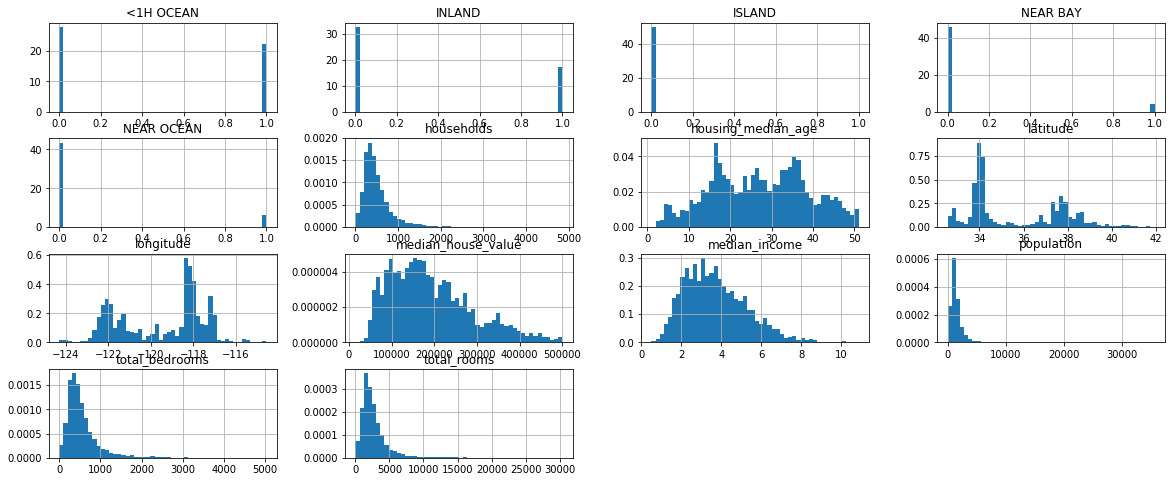

In [6]:
data_te.hist(bins=50, density=True, figsize=(20,8));

## Feature Engineering: Einfügen neues Merkmal: distance_centers

In [9]:
data_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-118.29,34.04,48.0,1353.0,488.0,1945.0,487.0,2.4359,123700.0,0.0,1.0,0.0,0.0,0.0
1,-122.05,37.36,29.0,1733.0,255.0,679.0,278.0,7.5337,406800.0,0.0,1.0,0.0,0.0,0.0
2,-118.42,34.19,33.0,3353.0,790.0,2318.0,775.0,2.2589,269700.0,0.0,1.0,0.0,0.0,0.0
3,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156,109500.0,1.0,0.0,0.0,0.0,0.0
4,-116.95,32.81,31.0,1277.0,293.0,698.0,237.0,3.1106,147700.0,0.0,1.0,0.0,0.0,0.0


In [5]:
#Festlegung der Center: 
lat_sf = 37.5
long_sf = -122.5
lat_la = 34
long_la = -118.5

#Berechnung der 'Entfernungen':
distance = pd.DataFrame()

distance['SF'] = ((data_tr.loc[:,'latitude'] - lat_sf)**2) + ((data_tr.loc[:,'longitude'] - long_sf)**2)**0.5
distance['LA'] = ((data_tr.loc[:,'latitude'] - lat_la)**2) + ((data_tr.loc[:,'longitude'] - long_la)**2)**0.5
data_tr['min_SFLA'] = distance.min(axis=1)

In [6]:
data_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,min_SFLA
0,-118.29,34.04,48.0,1353.0,488.0,1945.0,487.0,2.4359,123700.0,0.0,1.0,0.0,0.0,0.0,0.2116
1,-122.05,37.36,29.0,1733.0,255.0,679.0,278.0,7.5337,406800.0,0.0,1.0,0.0,0.0,0.0,0.4696
2,-118.42,34.19,33.0,3353.0,790.0,2318.0,775.0,2.2589,269700.0,0.0,1.0,0.0,0.0,0.0,0.1161
3,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156,109500.0,1.0,0.0,0.0,0.0,0.0,0.3641
4,-116.95,32.81,31.0,1277.0,293.0,698.0,237.0,3.1106,147700.0,0.0,1.0,0.0,0.0,0.0,2.9661


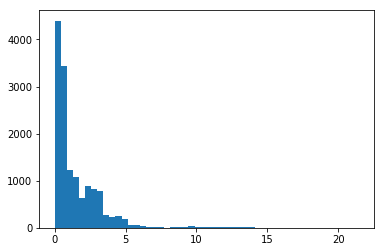

In [9]:
plt.hist(data_tr['min_SFLA'], bins = 50);

In [11]:
#Berechnung der 'Entfernungen':
distance_te = pd.DataFrame()

distance_te['SF'] = ((data_te.loc[:,'latitude'] - lat_sf)**2) + ((data_te.loc[:,'longitude'] - long_sf)**2)**0.5
distance_te['LA'] = ((data_te.loc[:,'latitude'] - lat_la)**2) + ((data_te.loc[:,'longitude'] - long_la)**2)**0.5
data_te['min_SFLA'] = distance_te.min(axis=1)

## Neues Merkmal: Bedrooms/Room

In [12]:
data_tr['br_per_rooms'] = data_tr.loc[:,'total_bedrooms'] / data_tr.loc[:,'total_rooms']
data_te['br_per_rooms'] = data_te.loc[:,'total_bedrooms'] / data_te.loc[:,'total_rooms']

## Standardisierung mit StandardScaler

In [13]:
import sklearn.preprocessing as pre
scaler = pre.StandardScaler(copy=True, with_mean=True, with_std=True)
data_tr_scaled = scaler.fit_transform(data_tr)
data_tr_scaled = pd.DataFrame(data_tr_scaled, columns = data_tr.columns)
print(len(data_tr_scaled))
data_tr_scaled.head()

14703


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,min_SFLA,br_per_rooms
0,0.603022,-0.721966,1.837914,-0.592086,-0.138165,0.420896,-0.052873,-0.797048,-0.682662,-0.305487,1.10742,-0.719479,-0.376803,-0.008247,-0.667293,2.655590
1,-1.297583,0.823924,0.173654,-0.420557,-0.684898,-0.695249,-0.592997,2.449411,2.283431,-0.305487,1.10742,-0.719479,-0.376803,-0.008247,-0.539487,-1.208978
2,0.537310,-0.652122,0.524025,0.310696,0.570476,0.749745,0.691412,-0.909767,0.847008,-0.305487,1.10742,-0.719479,-0.376803,-0.008247,-0.714600,0.392079
3,-1.383515,1.024145,1.487544,-0.531600,-0.546455,-0.446629,-0.608502,-0.109457,-0.831438,3.273460,-0.90300,-0.719479,-0.376803,-0.008247,-0.591749,-0.050353
4,1.280366,-1.294691,0.348839,-0.626392,-0.595732,-0.678498,-0.698954,-0.367375,-0.431209,-0.305487,1.10742,-0.719479,-0.376803,-0.008247,0.697204,0.280489


In [14]:
data_te_scaled = scaler.transform(data_te)
data_te_scaled = pd.DataFrame(data_te_scaled, columns = data_te.columns)
print(len(data_te_scaled))
data_te_scaled.head()


3676


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,min_SFLA,br_per_rooms
0,-1.868776,2.323251,-0.789865,-0.547850,-0.630929,-0.681143,-0.655020,-1.249010,-1.206521,-0.305487,-0.90300,1.389894,-0.376803,-0.008247,4.264015,-0.404555
1,1.214653,-1.201565,-1.928569,1.351604,0.901331,0.967508,1.019621,1.596816,0.522215,-0.305487,1.10742,-0.719479,-0.376803,-0.008247,0.416824,-0.894562
2,0.704118,-0.745248,0.611617,-0.584864,-0.649701,-0.407837,-0.608502,0.002881,-0.170327,-0.305487,1.10742,-0.719479,-0.376803,-0.008247,-0.568962,-0.302623
3,0.597968,-0.694028,-0.176716,0.569343,2.740982,2.995261,2.854490,-1.322246,0.771572,-0.305487,1.10742,-0.719479,-0.376803,-0.008247,-0.668085,4.033774
4,-2.070968,1.894872,-1.052643,-0.372710,-0.135819,-0.511870,-0.453443,-0.919957,-0.930971,-0.305487,1.10742,-0.719479,-0.376803,-0.008247,2.074084,0.940365


In [15]:
scaler.var_

array([3.91373806e+00, 4.61231481e+00, 1.30336156e+02, 4.90788208e+06,
       1.81619006e+05, 1.28654716e+06, 1.49729179e+05, 2.46573136e+00,
       9.10983133e+09, 7.80709586e-02, 2.47415298e-01, 2.24746612e-01,
       1.08870825e-01, 6.80087048e-05, 4.07512465e+00, 3.05310269e-03])

## Training und Prediction

In [16]:
#Train
from sklearn import linear_model as lm # Importieren der Klasse
lr = lm.LinearRegression()# instanziieren der Klasse
y = data_tr.loc[:,'median_house_value']
X = data_tr_scaled.drop('median_house_value',axis=1)
lr.fit(X, y)
#Predict für Traindaten:
print('Anpassung an Trainingsdaten:')
print('Bestimmtheitsmaß: ',lr.score(X,y))
y_predicted = lr.predict(X)
MSE_tr = ((sum((y_predicted - y)**2))/len(y))
print('MSE: ',round(MSE_tr,0))

Anpassung an Trainingsdaten:
Bestimmtheitsmaß:  0.6418799682227803
MSE:  3262413085.0


In [17]:
y_te = data_te.loc[:,'median_house_value']
X_te = data_te_scaled.drop('median_house_value',axis=1)
#Predict für Testdaten
print('Anpassung an Testdaten:')
print('Bestimmtheitsmaß: ',lr.score(X_te,y_te))
y_te_predicted = lr.predict(X_te)
MSE_lr = ((sum((y_te_predicted - y_te)**2))/len(y_te))
print('MSE: ',round(MSE_lr,0))

Anpassung an Testdaten:
Bestimmtheitsmaß:  0.6276779237678218
MSE:  3500402576.0


## Plot Testdaten:

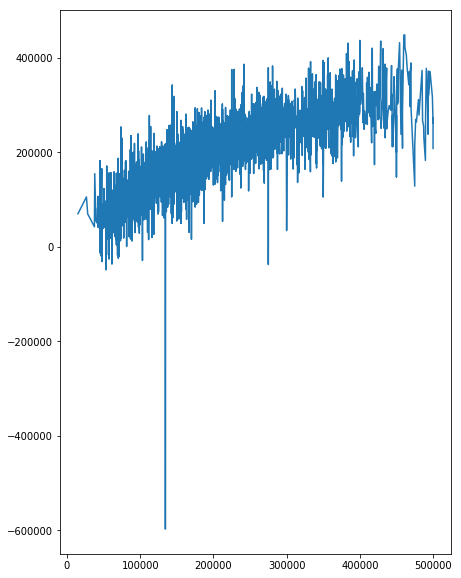

In [18]:
predictions = pd.DataFrame()
predictions['true_median_house_value'] = y_te
predictions['prediction'] = y_te_predicted
predictions.sort_values(by ='true_median_house_value', axis = 0, ascending=True, inplace=True)
plt.figure(figsize=(7,10))
plt.plot(predictions['true_median_house_value'],predictions['prediction']);


In [19]:
parameter_weights = pd.DataFrame()
parameter_weights['labels'] = X_te.columns
parameter_weights['Coeffs'] = list(map(lambda x: x.round(0), lr.coef_))

parameter_weights

,labels,Coeffs
0,longitude,-21215.0
1,latitude,-13981.0
2,housing_median_age,6189.0
3,total_rooms,6853.0
4,total_bedrooms,10043.0
5,population,-39785.0
6,households,26512.0
7,median_income,62171.0
8,NEAR BAY,-2492.0
9,<1H OCEAN,7390.0


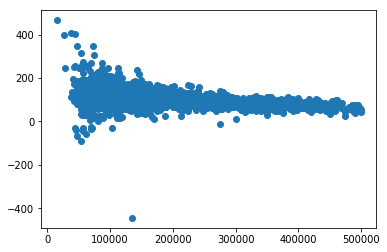

In [20]:
predictions['Abweichung in %'] = predictions.loc[:, 'prediction'] / predictions.loc[:, 'true_median_house_value']*100
plt.scatter(predictions.loc[:,'true_median_house_value'],predictions.loc[:,'Abweichung in %']);

## 2. Verfahren : K-neighbors

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
for i in range(2,7):
    neigh = KNeighborsRegressor(n_neighbors=i, algorithm='brute', weights='uniform' )
    neigh.fit(X, y)
    y_predicted = neigh.predict(X)
    MSE_KNR = (sum((y_predicted - y)**2))/len(y)
    print('MeanSquasredError:', MSE_KNR)
    y_quer = y.mean()
    R_quadrat = 1 - sum((y_predicted - y)**2) / sum((y-y_quer)**2)
    print('Bestimmtheitsmaß: ', R_quadrat)                                     

MeanSquasredError: 1064218967.8977419
Bestimmtheitsmaß:  0.8831790700258105
MeanSquasredError: 1452798434.1246243
Bestimmtheitsmaß:  0.8405241127446316
MeanSquasredError: 1687727580.2226543
Bestimmtheitsmaß:  0.8147355841118181
MeanSquasredError: 1826782592.931059
Bestimmtheitsmaß:  0.7994713044925044
MeanSquasredError: 1946173601.6546342
Bestimmtheitsmaß:  0.7863655724106977


## für die Testdaten

In [23]:
for i in range(2,20):
    neigh = KNeighborsRegressor(n_neighbors=i, algorithm='brute', weights='uniform' )
    neigh.fit(X, y)
    y_te_predicted = neigh.predict(X_te)
    MSE_KNR = (sum((y_te_predicted - y_te)**2))/len(y_te)
    print(i)
    print('MeanSquasredError:', MSE_KNR)
    y_te_quer = y_te.mean()
    R_te_quadrat = 1 - sum((y_te_predicted - y_te)**2) / sum((y_te-y_te_quer)**2)
    print('Bestimmtheitsmaß: ', R_te_quadrat)    

2
MeanSquasredError: 3301648049.102557
Bestimmtheitsmaß:  0.6488185487874246
3
MeanSquasredError: 3138701640.9808226
Bestimmtheitsmaß:  0.6661504252391324
4
MeanSquasredError: 3016863397.4805665
Bestimmtheitsmaß:  0.6791098111364999
5
MeanSquasredError: 2926261681.865364
Bestimmtheitsmaß:  0.6887467080736961
6
MeanSquasredError: 2887356107.573437
Bestimmtheitsmaß:  0.6928849190025719
7
MeanSquasredError: 2879464219.5734653
Bestimmtheitsmaß:  0.6937243436291278
8
MeanSquasredError: 2877467000.4304357
Bestimmtheitsmaß:  0.693936778845301
9
MeanSquasredError: 2878693563.9116635
Bestimmtheitsmaß:  0.693806314805241
10
MeanSquasredError: 2894522473.967089
Bestimmtheitsmaß:  0.6921226648456735
11
MeanSquasredError: 2885811566.101589
Bestimmtheitsmaß:  0.6930492049311369
12
MeanSquasredError: 2894227394.1061893
Bestimmtheitsmaß:  0.6921540511631226
13
MeanSquasredError: 2913547262.0367746
Bestimmtheitsmaß:  0.6900990837177153
14
MeanSquasredError: 2923896127.751991
Bestimmtheitsmaß:  0.688998

Auffällig im Plot der Testdaten ist der Ausreisser mit negativem House_value im Bereich von -400000!!. Diesen möchte ich mir gerne näher ansehen

In [24]:
y_te_predicted[2116]

161568.42105263157

In [25]:
data_te.iloc[1620:1630, :]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,min_SFLA,br_per_rooms
1620,-118.55,34.20,21.0,2549.0,651.0,1624.0,628.0,3.6905,179800.0,0.0,1.0,0.0,0.0,0.0,0.0900,0.255394
1621,-118.15,34.13,34.0,824.0,224.0,430.0,213.0,3.6389,215000.0,0.0,1.0,0.0,0.0,0.0,0.3669,0.271845
1622,-118.36,33.94,39.0,1390.0,410.0,1666.0,371.0,3.3056,156800.0,0.0,1.0,0.0,0.0,0.0,0.1436,0.294964
1623,-118.28,33.88,19.0,2758.0,675.0,2047.0,591.0,2.6618,179700.0,0.0,1.0,0.0,0.0,0.0,0.2344,0.244743
1624,-118.09,33.91,14.0,2369.0,604.0,1546.0,464.0,3.7969,159400.0,0.0,1.0,0.0,0.0,0.0,0.4181,0.254960
1625,-118.56,34.23,36.0,3215.0,529.0,1710.0,539.0,5.5126,248400.0,0.0,1.0,0.0,0.0,0.0,0.1129,0.164541
1626,-122.64,41.95,18.0,1867.0,424.0,802.0,314.0,1.8242,53500.0,0.0,0.0,1.0,0.0,0.0,19.9425,0.227102
1627,-118.47,34.04,21.0,5041.0,1491.0,2719.0,1420.0,3.5335,268800.0,0.0,1.0,0.0,0.0,0.0,0.0316,0.295775
1628,-121.38,38.49,11.0,8537.0,1643.0,4224.0,1648.0,2.9647,108900.0,0.0,0.0,1.0,0.0,0.0,2.1001,0.192456
1629,-122.56,37.90,36.0,1760.0,283.0,562.0,246.0,6.7546,402400.0,1.0,0.0,0.0,0.0,0.0,0.2200,0.160795


Hier sehen wir extreme Werte für total_rooms und population. ich würde den Ausreisser entfernen und vielleicht auch die nächsten 2-3 und sehen, wie sich die Anpassung des Modells verbessert


In [26]:
y_te_predicted.argmin()

2117

In [27]:
data_te['y_te_predicted_LR'] = y_te_predicted

In [28]:
liste_outliers = (data_te[data_te.loc[:,'y_te_predicted_LR'].values <0]).index.values

In [29]:
liste_outliers

array([], dtype=int64)

In [30]:
data_te

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,min_SFLA,br_per_rooms,y_te_predicted_LR
0,-123.18,40.58,18.0,1451.0,278.0,695.0,254.0,1.7262,73700.0,0.0,0.0,1.0,0.0,0.0,10.1664,0.191592,84478.947368
1,-117.08,33.01,5.0,5659.0,931.0,2565.0,902.0,6.1949,238700.0,0.0,1.0,0.0,0.0,0.0,2.4001,0.164517,248894.736842
2,-118.09,33.99,34.0,1369.0,270.0,1005.0,272.0,3.6920,172600.0,0.0,1.0,0.0,0.0,0.0,0.4101,0.197224,176763.157895
3,-118.30,34.10,25.0,3926.0,1715.0,4865.0,1612.0,1.6112,262500.0,0.0,1.0,0.0,0.0,0.0,0.2100,0.436831,238089.473684
4,-123.58,39.66,15.0,1839.0,489.0,887.0,332.0,2.2429,100000.0,0.0,1.0,0.0,0.0,0.0,5.7456,0.265905,117926.315789
5,-117.12,32.76,26.0,1221.0,331.0,620.0,296.0,2.4821,123600.0,0.0,0.0,0.0,1.0,0.0,2.9176,0.271089,171089.473684
6,-117.14,32.76,35.0,2539.0,661.0,1308.0,629.0,2.6777,146400.0,0.0,0.0,0.0,1.0,0.0,2.8976,0.260339,181163.157895
7,-122.50,37.76,43.0,2108.0,456.0,1299.0,447.0,3.1406,316200.0,0.0,0.0,0.0,1.0,0.0,0.0676,0.216319,263636.842105
8,-119.78,36.77,45.0,1315.0,256.0,666.0,240.0,2.3562,58100.0,0.0,0.0,1.0,0.0,0.0,3.2529,0.194677,64163.157895
9,-117.64,34.05,32.0,1129.0,251.0,1378.0,268.0,3.0057,96900.0,0.0,0.0,1.0,0.0,0.0,0.8625,0.222321,117831.578947


In [31]:
dat = pd.DataFrame()

dat['population'] = data_train.loc[:,'population'] 

dat['median_house_value'] = data_train.loc[:,'median_house_value']
dat =dat.sort_values(by=['population'])


#plt.scatter(dat['population'],dat['median_house_value'], alpha=0.1)
#plt.hist(dat['population'], bins=100);


In [73]:
mean = []
for i in range(0,100):
    mean.append((dat['median_house_value'][dat['population'] < 1000*i].mean()))

In [72]:
mean

[nan,
 171841.32666666666,
 171476.94392523365,
 173008.95335820896,
 174695.37990762125,
 176843.12198912198,
 179961.151547492,
 183660.81416603198,
 184622.3371733633,
 186480.28992520898,
 187604.7302283105,
 188194.85354477612,
 187831.65636960088,
 187788.65345803593,
 187646.58914903196,
 187498.7798927332,
 187489.25412345678,
 187835.04062294774,
 187846.82693347757,
 187793.92209373097,
 187969.36540567866,
 187879.47144732522,
 187924.48897827836,
 188011.42457305503,
 188067.69406819245,
 188158.44898272553,
 188221.61120814033,
 188348.4710389903,
 188350.10404882405,
 188411.18876686075,
 188439.73659963437,
 188467.19177982718,
 188540.68687306053,
 188463.4717495872,
 188499.82804782016,
 188596.09171302238,
 188541.21890300149,
 188559.72099936302,
 188616.5724964739,
 188638.8442288767,
 188686.02973560558,
 188703.89987396722,
 188711.18007127385,
 188686.27656010052,
 188701.71414634146,
 188769.2841343813,
 188755.54229754134,
 188743.63887347392,
 188741.054605855

In [58]:
data_tr[data_tr['housing_median_age'] > 50]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,old
314,-117.73,34.06,51.0,498.0,115.0,368.0,112.0,1.4063,98800.0,0.0,0.0,1.0,0.0,0.0,1
658,-122.25,37.79,51.0,175.0,43.0,228.0,55.0,2.1000,75000.0,1.0,0.0,0.0,0.0,0.0,1
870,-122.00,36.93,51.0,1616.0,374.0,608.0,302.0,3.1932,400000.0,0.0,0.0,0.0,1.0,0.0,1
1090,-118.26,34.09,51.0,1532.0,366.0,669.0,333.0,3.6434,278800.0,0.0,1.0,0.0,0.0,0.0,1
1709,-121.93,37.32,51.0,2711.0,728.0,1607.0,724.0,3.0000,184700.0,0.0,1.0,0.0,0.0,0.0,1
2005,-122.48,37.75,51.0,2095.0,410.0,1126.0,429.0,4.4000,318400.0,1.0,0.0,0.0,0.0,0.0,1
2174,-119.77,36.74,51.0,1454.0,235.0,729.0,252.0,3.3125,70100.0,0.0,0.0,1.0,0.0,0.0,1
2220,-118.30,34.05,51.0,1005.0,314.0,1227.0,306.0,2.4297,162500.0,0.0,1.0,0.0,0.0,0.0,1
2336,-122.12,37.12,51.0,2419.0,485.0,1078.0,435.0,2.7933,206900.0,0.0,0.0,0.0,1.0,0.0,1
2375,-121.90,38.03,51.0,2982.0,689.0,1831.0,608.0,2.0034,87700.0,0.0,0.0,1.0,0.0,0.0,1


In [55]:
data_tr['old'][data_tr['housing_median_age'] > 50] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
data_tr.head(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,old


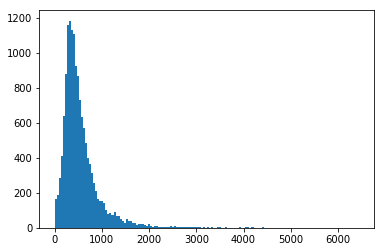

In [74]:
plt.hist(data_tr['total_bedrooms'], bins=150);